## Analisis de SuperTienda

#### En este analisis se busca detectar los paises con mayor crecimiento y margen de ganancias en LATAM, y por otro lado detectar los paises donde la compañia no esta funcionando dentro de lo esperado.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df_tienda = pd.read_excel('Muestra - Supertienda.xls')
df_tienda

,Id. de la fila,Id. del pedido,Fecha del pedido,Fecha de envío,Método de envío,Id. del cliente,Nombre del cliente,Segmento,Ciudad,Provincia/Estado/Departamento,País/Región,Región,Id. del producto,Categoría,Subcategoría,Nombre del producto,Ventas,Cantidad,Descuento,Ganancia
0,1682,MX-2023-111899,2023-04-02,2023-04-06,Estándar,AM-11365,Araceli Manzanares,Empresa,Cruzeiro do Sul,Acre,Brasil,Sur,MAT-AR-10004857,Material de oficina,Arte,"Boston Rotuladores, Tamaños variados",591.0000,3,0.000,206.4000
1,5919,MX-2023-113922,2023-10-08,2023-10-11,Rápido,BS-12130,Benjamín Saavedra,Cliente,Rio Branco,Acre,Brasil,Sur,MOB-LI-10000647,Mobiliario,Librerías,"Dania Conjunto de estantes, Metal",2250.8000,2,0.000,922.8000
2,5920,MX-2023-113922,2023-10-08,2023-10-11,Rápido,BS-12130,Benjamín Saavedra,Cliente,Rio Branco,Acre,Brasil,Sur,MAT-CA-10002956,Material de oficina,Carpetas,"Avery Anillas, Transparente",129.0000,5,0.000,11.0000
3,9013,MX-2021-163888,2021-06-14,2021-06-18,Estándar,AT-10090,Alejandro Trejo,Cliente,Rio Branco,Acre,Brasil,Sur,MOB-MO-10002100,Mobiliario,Mobiliario,"Tenex Bandeja apiladora, Negro",504.6000,3,0.000,95.4000
4,9014,MX-2021-163888,2021-06-14,2021-06-18,Estándar,AT-10090,Alejandro Trejo,Cliente,Rio Branco,Acre,Brasil,Sur,MOB-LI-10002747,Mobiliario,Librerías,"Safco Vitrina, Convencional",3376.8000,3,0.000,641.4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10249,9786,US-2021-126284,2021-10-16,2021-10-22,Estándar,VM-21460,Valentina Macías,Pequeña empresa,Cabimas,Zulia,Venezuela,Sur,TEC-MÁ-10002523,Tecnología,Máquinas,"Konica Calculadora, Blanco",400.3200,2,0.400,-253.6800
10250,9787,US-2021-126284,2021-10-16,2021-10-22,Estándar,VM-21460,Valentina Macías,Pequeña empresa,Cabimas,Zulia,Venezuela,Sur,TEC-CO-10000750,Tecnología,Copiadoras,"Canon Fotocopiadora, 2",2090.1296,2,0.402,-77.0704
10251,9788,US-2021-126284,2021-10-16,2021-10-22,Estándar,VM-21460,Valentina Macías,Pequeña empresa,Cabimas,Zulia,Venezuela,Sur,MAT-ET-10000840,Material de oficina,Etiquetas,"Smead Etiquetas para carpetas de archivos, Blanco",319.6800,9,0.400,31.6800
10252,9789,US-2021-126284,2021-10-16,2021-10-22,Estándar,VM-21460,Valentina Macías,Pequeña empresa,Cabimas,Zulia,Venezuela,Sur,MAT-SU-10000079,Material de oficina,Suministros,"Elite Recortadora, Azul",500.0400,3,0.400,-33.3600


In [3]:
df_tienda.shape

(10254, 20)

In [4]:
df_tienda.describe().T

,count,mean,min,25%,50%,75%,max,std
Id. de la fila,10254.0,5146.149308,1.0,2574.25,5146.5,7718.75,10288.0,2970.876591
Fecha del pedido,10254,2022-05-21 04:42:33.071972096,2020-01-03 00:00:00,2021-07-10 00:00:00,2022-07-05 12:00:00,2023-05-22 00:00:00,2023-12-31 00:00:00,NaN
Fecha de envío,10254,2022-05-23 06:35:35.985956608,2020-01-07 00:00:00,2021-07-13 00:00:00,2022-07-09 00:00:00,2023-05-19 00:00:00,2023-12-31 00:00:00,NaN
Ventas,10254.0,2103.379037,15.66,328.8,803.96,2277.9,34740.8,3491.494504
Cantidad,10254.0,3.740492,1.0,2.0,3.0,5.0,14.0,2.199333
Descuento,10254.0,0.135709,0.0,0.0,0.0,0.4,0.8,0.195662
Ganancia,10254.0,214.737238,-18062.4,-7.74,80.0,325.8,13132.8,1189.617598


In [5]:
#Chequeamos si hay valores duplicados
print(df_tienda['Id. de la fila'].duplicated().sum())

0


In [6]:
print(df_tienda['Id. de la fila'].isna().sum())

0


### Con esta pequeño aproach a los datos podemos ver:
*-No hay valores nulos*<br>
*-No hay valores duplicados*<br>
*-Y el dataset esta en condiciones de empezar a hacer graficos de analisis*<br>
*-Posee 10254 filas y  20 colummnas*

### A simple vista parece preponderar un tipo de envio. <br> Se comprueba graficamente

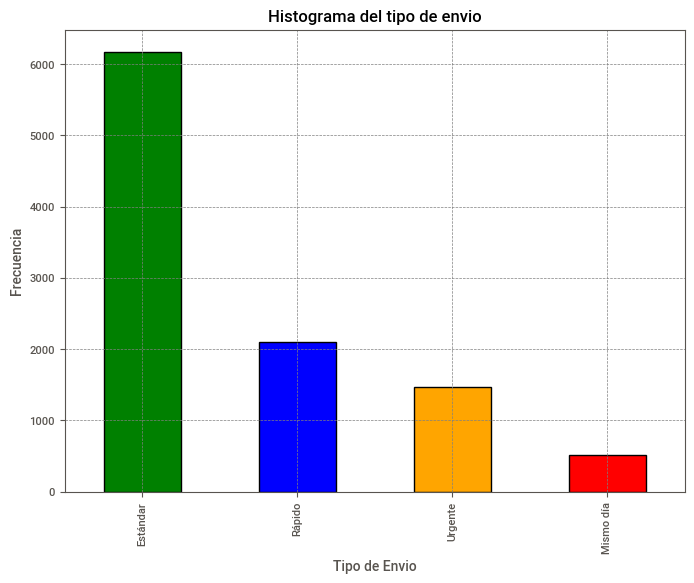

In [8]:

envio_counts = df_tienda['Método de envío'].value_counts()

# Se define una paleta de colores para cada tipo de envío
colors = ['green', 'blue', 'orange', 'red', 'purple']  # Ajusta según la cantidad de métodos de envío

#Se crea un gráfico de barras con diferentes colores
envio_counts.plot(kind='bar', color=colors, edgecolor='black', figsize=(8, 6))

#Se añade eñ titulo y la etiqueta
plt.title('Histograma del tipo de envio')
plt.xlabel('Tipo de Envio')
plt.ylabel('Frecuencia')

# Añade cuadrícula
plt.grid(color='gray', linestyle='--', linewidth=0.5)
#Mostramos el grafico
plt.show()

### Vemos el segmento de la clientela que más compras realiza

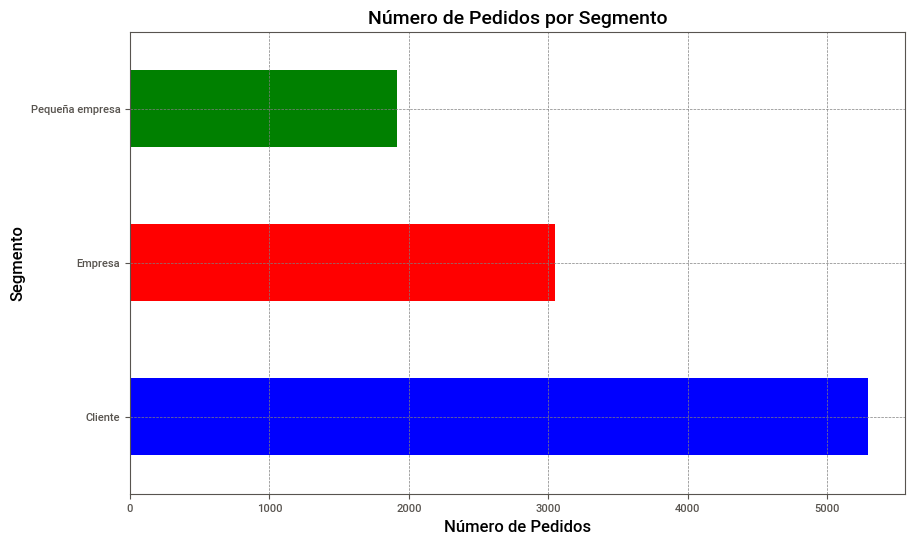

In [9]:

#Podemos agrupar por 'Segmento' y contar el número de pedidos
df_tienda_counts = df_tienda.groupby('Segmento').size()

# Se crea el grafico
df_tienda_counts.plot(kind='barh', color=['blue', 'red', 'green'], figsize=(10, 6))

# Personaliza el gráfico
plt.title('Número de Pedidos por Segmento', color='black', fontsize=14)
plt.xlabel('Número de Pedidos', color='black', fontsize=12)
plt.ylabel('Segmento', color='black', fontsize=12)

# Añade cuadrícula
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Mostrar el gráfico
plt.show()

#### Podemos ver que tipo de envio y la clientela mas descatada en la gestion de la empresa. Ahora se puede analizar las Ganancias y Ventas de la compañia


In [10]:
# Se cambia el formato de la columna de fecha a 'YYYY/MM/DD'
df_tienda['fecha_formateada'] = df_tienda['Fecha del pedido'].dt.strftime('%Y/%m/%d')


# Se muestra el DataFrame modificado
print("\nDataFrame modificado:")
df_tienda.head()


DataFrame modificado:


,Id. de la fila,Id. del pedido,Fecha del pedido,Fecha de envío,Método de envío,Id. del cliente,Nombre del cliente,Segmento,Ciudad,Provincia/Estado/Departamento,...,Región,Id. del producto,Categoría,Subcategoría,Nombre del producto,Ventas,Cantidad,Descuento,Ganancia,fecha_formateada
0,1682,MX-2023-111899,2023-04-02,2023-04-06,Estándar,AM-11365,Araceli Manzanares,Empresa,Cruzeiro do Sul,Acre,...,Sur,MAT-AR-10004857,Material de oficina,Arte,"Boston Rotuladores, Tamaños variados",591.0,3,0.0,206.4,2023/04/02
1,5919,MX-2023-113922,2023-10-08,2023-10-11,Rápido,BS-12130,Benjamín Saavedra,Cliente,Rio Branco,Acre,...,Sur,MOB-LI-10000647,Mobiliario,Librerías,"Dania Conjunto de estantes, Metal",2250.8,2,0.0,922.8,2023/10/08
2,5920,MX-2023-113922,2023-10-08,2023-10-11,Rápido,BS-12130,Benjamín Saavedra,Cliente,Rio Branco,Acre,...,Sur,MAT-CA-10002956,Material de oficina,Carpetas,"Avery Anillas, Transparente",129.0,5,0.0,11.0,2023/10/08
3,9013,MX-2021-163888,2021-06-14,2021-06-18,Estándar,AT-10090,Alejandro Trejo,Cliente,Rio Branco,Acre,...,Sur,MOB-MO-10002100,Mobiliario,Mobiliario,"Tenex Bandeja apiladora, Negro",504.6,3,0.0,95.4,2021/06/14
4,9014,MX-2021-163888,2021-06-14,2021-06-18,Estándar,AT-10090,Alejandro Trejo,Cliente,Rio Branco,Acre,...,Sur,MOB-LI-10002747,Mobiliario,Librerías,"Safco Vitrina, Convencional",3376.8,3,0.0,641.4,2021/06/14


In [11]:
#Se quiere establecer una relación entre el tiempo y las ventas y ganancias.
#Por ello se debe chequear que la feature 'Fecha del pedido' sea del tipo date
df_tienda['Fecha del pedido'].dtype

dtype('<M8[ns]')

#### Se puede ver perdidas através de los años que han sido considerables pero la frecuencia de las ganancias superan la frecuencia de las perdidas

In [13]:
# Se filtra las filas donde 'Ganancia' es positiva (ganancias) y negativa (pérdidas)
ganancias_count = df_tienda[df_tienda['Ganancia'] > 0]['Ganancia'].count()
perdidas_count = df_tienda[df_tienda['Ganancia'] < 0]['Ganancia'].count()

# Se crea un diccionario con los resultados
data = {
    'Tipo': ['Ganancias', 'Pérdidas'],
    'Conteo': [ganancias_count, perdidas_count]
}

# Se transforma el diccionario a un DataFrame
df_resultado = pd.DataFrame(data)

# Se mustra el DataFrame
print(df_resultado)

        Tipo  Conteo
0  Ganancias    7410
1   Pérdidas    2692


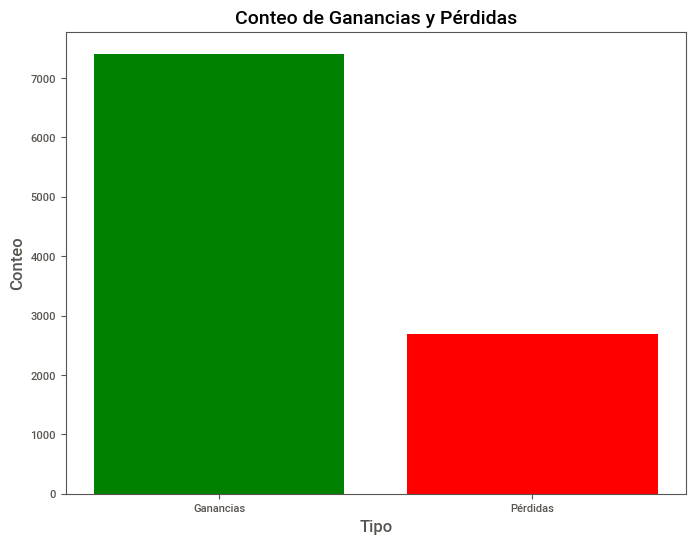

In [14]:
# Se crea el gráfico de barras
plt.figure(figsize=(8,6))
plt.bar(df_resultado['Tipo'], df_resultado['Conteo'], color=['green', 'red'])

# Añadir títulos y etiquetas
plt.title('Conteo de Ganancias y Pérdidas', fontsize=14)
plt.xlabel('Tipo', fontsize=12)
plt.ylabel('Conteo', fontsize=12)

# Mostrar el gráfico
plt.show()

### Se puede identidicar en que periodo hubo Perdidas, para hacer un análisis más exaustivo para tratar de determinar porque no se obtuvieron Ganancias y bajo que condiciones ocurrio ello

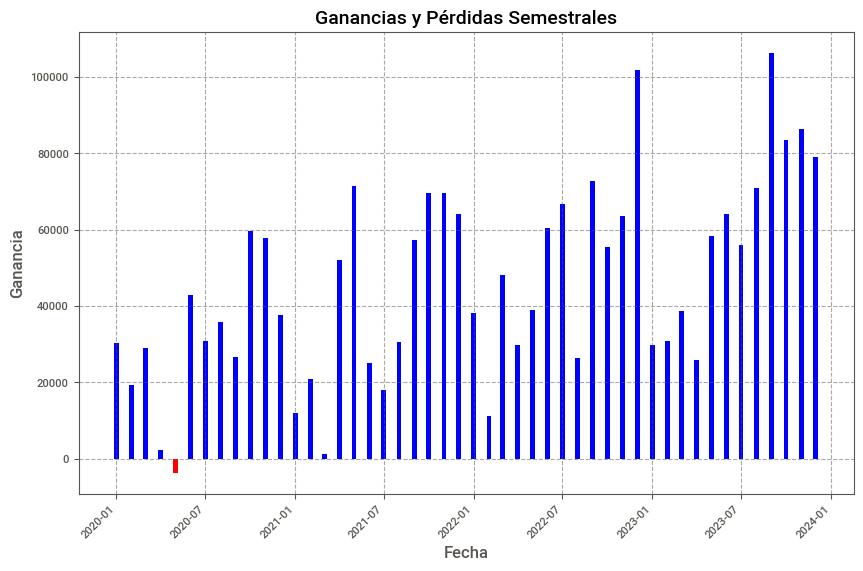

In [15]:
import pandas as pd
import matplotlib.pyplot as plt


# Se crea una columna adicional con el mes y el año de 'Fecha del pedido' para usar en el eje X
df_tienda['Mes_Año'] = df_tienda['Fecha del pedido'].dt.to_period('M')

# Se agrupa por 'Mes_Año' y se suma las ganancias/pérdidas por mes
df_agrupado = df_tienda.groupby('Mes_Año')['Ganancia'].sum().reset_index()

# Se convierte la columna 'Mes_Año' de nuevo a tipo fecha para el gráfico
df_agrupado['Mes_Año'] = df_agrupado['Mes_Año'].dt.to_timestamp()

# Gráfico de barras
plt.figure(figsize=(10,6))

# Se grafica las ganancias/pérdidas con un ancho de barra mayor
colors = ['blue' if x > 0 else 'red' for x in df_agrupado['Ganancia']]
plt.bar(df_agrupado['Mes_Año'], df_agrupado['Ganancia'], color=colors, width=10)  # Ajusta el valor de width según lo desees

# Etiquetas y título
plt.title('Ganancias y Pérdidas Semestrales', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Ganancia', fontsize=12)

# Se formatea el eje X para que muestre las fechas con el formato de mes y año
plt.xticks(rotation=45, ha='right')

# Cuadrícula para mejorar la legibilidad
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar el gráfico
plt.show()


### De esta manera se puede eviar incurrir en dichos errores o trabajar en las circunstancias que dieron como resultado periodos de Perdidas